In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm
from scipy.stats import ttest_1samp, ttest_ind,ttest_rel

In [2]:
df = pd.read_csv("Cold_Storage_Temp_Data_-1.csv")
df.head()

,Season,Month,Date,Temperature
0,Winter,Jan,1,2.3
1,Winter,Jan,2,2.2
2,Winter,Jan,3,2.4
3,Winter,Jan,4,2.8
4,Winter,Jan,5,2.5


In [3]:
df.describe()

,Date,Temperature
count,365.000000,365.000000
mean,15.720548,3.002466
std,8.808321,0.465832
min,1.000000,1.700000
25%,8.000000,2.700000
50%,16.000000,3.000000
75%,23.000000,3.300000
max,31.000000,4.500000


In [4]:
Winter=df[df['Season']=='Winter']
Winter.describe()

,Date,Temperature
count,123.000000,123.000000
mean,15.878049,2.776423
std,8.913597,0.414310
min,1.000000,1.800000
25%,8.000000,2.450000
50%,16.000000,2.800000
75%,23.500000,3.000000
max,31.000000,3.900000


In [5]:
Summer=df[df['Season']=='Summer']
Summer.describe()

,Date,Temperature
count,120.000000,120.000000
mean,15.525000,3.147500
std,8.734133,0.351698
min,1.000000,2.500000
25%,8.000000,2.900000
50%,15.500000,3.200000
75%,23.000000,3.400000
max,31.000000,4.000000


In [6]:
Rainy=df[df['Season']=='Rainy']
Rainy.describe()

,Date,Temperature
count,122.000000,122.000000
mean,15.754098,3.087705
std,8.843274,0.527207
min,1.000000,1.700000
25%,8.000000,2.700000
50%,16.000000,3.050000
75%,23.000000,3.400000
max,31.000000,4.500000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Season       365 non-null    object 
 1   Month        365 non-null    object 
 2   Date         365 non-null    int64  
 3   Temperature  365 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 11.5+ KB


In [8]:
# question 1
summer_avg = df[df['Season'] == 'Summer']['Temperature'].mean()
print('Avg_Summer: {}'.format(summer_avg))
winter_avg = df[df['Season'] == 'Winter']['Temperature'].mean()
print('Avg_Winter: {}'.format(winter_avg))
rainy_avg = df[df['Season'] == 'Rainy']['Temperature'].mean()
print('Avg_Rainy: {}'.format(rainy_avg))

Avg_Summer: 3.1475
Avg_Winter: 2.776422764227643
Avg_Rainy: 3.0877049180327876


In [9]:
# question 2
avg_temp = df['Temperature'].mean()
print('Avg: {}'.format(avg_temp))

Avg: 3.0024657534246546


C:\Users\vishw\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


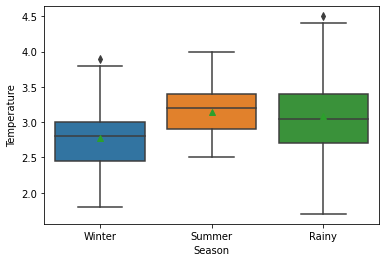

In [10]:
sns.boxplot(df['Season'],df['Temperature'],orient='v',showmeans=True);

C:\Users\vishw\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\vishw\Anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


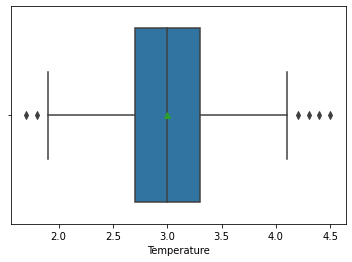

In [11]:
sns.boxplot(df['Temperature'],orient='v',showmeans=True);

In [12]:
# question 3
std_dev = df['Temperature'].std()
print('Std: {}'.format(std_dev))

Std: 0.4658319416510761


In [13]:
# question 4
# standardize value to compare: (X - mean)/std
stand_value = (2-avg_temp)/std_dev #In statistics, the standard score is the number of standard deviations 
#by which the value of a raw score (i.e., an observed value or data point) is above or below the mean 
#value of what is being observed or measured. Raw scores above the mean have positive standard scores, 
#while those below the mean have negative standard scores.
p = norm.cdf(stand_value)#Use the CDF to determine the probability that a random observation that is 
#taken from the population will be less than or equal to a certain value. You can also use this information
#to determine the probability that an observation will be greater than a certain value, or between two values.
print("Probability P(X < 2): {}".format(p))

Probability P(X < 2): 0.015699064791364483


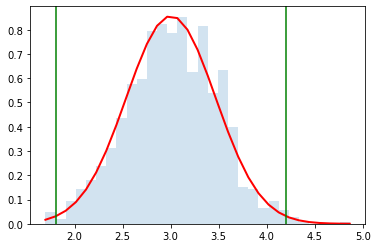

In [14]:
s=np.random.normal(avg_temp,std_dev,1000)
ci = norm.interval(0.99,loc=3.0025,scale=0.466)
count,bins,ignored=plt.hist(s,30,alpha=0.2,density=True)
plt.plot(bins,1/(std_dev*np.sqrt(2*np.pi))*np.exp(-(bins-avg_temp)**2/(2*std_dev**2)),linewidth=2,color='r')
plt.axvline(ci[0],color='g')
plt.axvline(ci[1],color='g')
plt.show()

In [15]:
# question 5
stand_value = (4-avg_temp)/std_dev
p_4 = norm.cdf(stand_value)
# p = 1-p because it asks for the probability above
p_4 = 1 - p_4
print("Probability P(X > 4): {}".format(p_4))

Probability P(X > 4): 0.016120748141275842


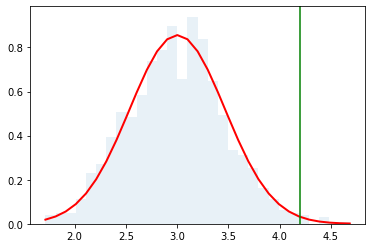

In [16]:
s=np.random.normal(avg_temp,std_dev,1000)
ci = norm.interval(0.99,loc=3.0025,scale=0.466)
count,bins,ignored=plt.hist(s,30,alpha=0.1,density=True)
plt.plot(bins,1/(std_dev*np.sqrt(2*np.pi))*np.exp(-(bins-avg_temp)**2/(2*std_dev**2)),linewidth=2,color='r')
#plt.axvline(ci[0],color='g')
plt.axvline(ci[1],color='g')
plt.fill_between(x=np.arange(4,ci[0],0.01), 
                 y1= norm.cdf(np.arange(4,ci[0],0.01),loc=3.0025,scale=0.466),
                 facecolor='red',
                 alpha=0.1)
plt.show()

In [17]:
# question 6
penalty = p + p_4
print("Probability total: {}".format(penalty))

Probability total: 0.03181981293264033


The probability for question 6 is 3.18%, so the penalty is 10%.

# Problem 2:

1) The test necessary is a t-test to compare the mean of the last 35 days with 3.9 with alpha 0.1. If the test results in a failure (the mean cannot be equal to 3.9 for alpha 0.1), then an action is needed.

In [18]:
Cold_Mar= pd.read_csv("Cold_Storage_Mar2018_.csv")
Cold_Mar.head(10)

,Season,Month,Date,Temperature
0,Summer,Feb,11,4.0
1,Summer,Feb,12,3.9
2,Summer,Feb,13,3.9
3,Summer,Feb,14,4.0
4,Summer,Feb,15,3.8
5,Summer,Feb,16,4.0
6,Summer,Feb,17,4.1
7,Summer,Feb,18,4.0
8,Summer,Feb,19,3.8
9,Summer,Feb,20,3.9


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Season       365 non-null    object 
 1   Month        365 non-null    object 
 2   Date         365 non-null    int64  
 3   Temperature  365 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 11.5+ KB


In [20]:
df.describe()

,Date,Temperature
count,365.000000,365.000000
mean,15.720548,3.002466
std,8.808321,0.465832
min,1.000000,1.700000
25%,8.000000,2.700000
50%,16.000000,3.000000
75%,23.000000,3.300000
max,31.000000,4.500000


In [21]:
Winter=df[df['Season']=='Winter']
Winter.describe()

,Date,Temperature
count,123.000000,123.000000
mean,15.878049,2.776423
std,8.913597,0.414310
min,1.000000,1.800000
25%,8.000000,2.450000
50%,16.000000,2.800000
75%,23.500000,3.000000
max,31.000000,3.900000


In [22]:
Summer=df[df['Season']=='Summer']
Summer.describe()

,Date,Temperature
count,120.000000,120.000000
mean,15.525000,3.147500
std,8.734133,0.351698
min,1.000000,2.500000
25%,8.000000,2.900000
50%,15.500000,3.200000
75%,23.000000,3.400000
max,31.000000,4.000000


In [23]:
Rainy=df[df['Season']=='Rainy']
Rainy.describe()

,Date,Temperature
count,122.000000,122.000000
mean,15.754098,3.087705
std,8.843274,0.527207
min,1.000000,1.700000
25%,8.000000,2.700000
50%,16.000000,3.050000
75%,23.000000,3.400000
max,31.000000,4.500000


2) The null hypothesis for this test is that the mean of temperatures = 3.9. Here's the code to calculate the p-value from the test


In [24]:
temperatures = list(Cold_Mar[' Temperature '])
t_Statistics,p_value=ttest_1samp(temperatures,3.9)
t_Statistics,p_value
print("P_value found: {}".format(p_value))

P_value found: 0.009422395404264431


3) The p value found is 0.0094, that is less than alpha (0.1). We can infer that our null hypothesis (mean =3.9) is false, and a corrective action is needed.